# Final notebook

## Top 10 movies with best earnings

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import sqlite3
from scipy import stats
import numpy as np

### Sakeholders need invest in good proyects, that's why understanding that the best proyects have big earnings, we tried to find which were the top ten movies with best earnings

In [2]:
# dataset
tn_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col=0)
tn_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [3]:
# Selecting columns no get earnings
columns =  ['production_budget', 'domestic_gross','worldwide_gross']


In [4]:
# Cleaning signs and converting in integers
def cleaning(columns):
    for x in columns:
        tn_budgets[x]=tn_budgets[x].apply(lambda x: x.replace(",","").replace("$",""))
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])

In [5]:
# Calling funtion
cleaning(columns)

In [6]:
# Getting earnings and sorting in descent order
tn_budgets["Earnings"]=tn_budgets["worldwide_gross"]-tn_budgets["production_budget"]
tn_budgets.sort_values(by="Earnings", ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Earnings
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224


In [7]:
# Getting top ten movies from dataframe
tp1=tn_budgets.sort_values(by="Earnings", ascending=False).head(10).copy()
topten = tp1.loc[:,["movie", "Earnings"]]

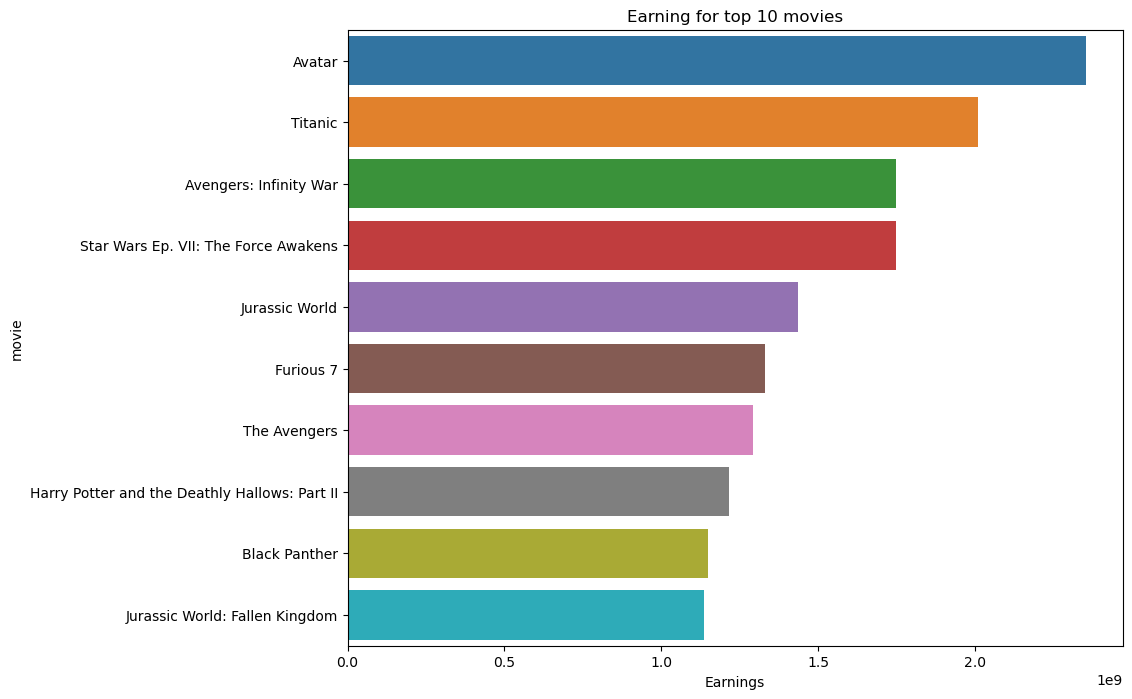

In [8]:
# Graph top ten highest earnings
fig= plt.subplots(figsize=(10, 8))
sbn.barplot(y ="movie", x ="Earnings", data = topten)
plt.title("Earning for top 10 movies")
plt.show()

In [9]:
# We couldn't join tables with dataset in.db in SQL, that's why we did a new dataframe.
# Making dataframe with genres, directors and titles
genres_tp=["Action, Adventure, Sci-fi, Fantasy", "Drama",  "Action, Sci-fi",
           "Action, Sci-fi-, Adventure, Fantasy", "Action, Sci-fi-, Thriller, Adventure",
           "Action, Adventure", "Action, Fantasy, Adventure, Sci-fi", "Adventure, Fantasy, Mystery, Drama",
          "Action, Fantasy, Adventure, Sci-fi", "Action, Adventure, Sci-Fi"]
director_tp=["James Cameron", "James Cameron", "Anthony Russo, Joe Russo", "J.J. Abrams", "Colin Trevorrow",
            "James Wan", "Joss Whedon", "David Yates", "Ryan Coogler", "J.A. Bayona"]
title = list(tn_budgets["movie"])
ID_df=pd.DataFrame(zip(title,genres_tp, director_tp), columns = [ "Title", "Genre", "Director"])

ID_df

,Title,Genre,Director
0,Avatar,"Action, Adventure, Sci-fi, Fantasy",James Cameron
1,Pirates of the Caribbean: On Stranger Tides,Drama,James Cameron
2,Dark Phoenix,"Action, Sci-fi","Anthony Russo, Joe Russo"
3,Avengers: Age of Ultron,"Action, Sci-fi-, Adventure, Fantasy",J.J. Abrams
4,Star Wars Ep. VIII: The Last Jedi,"Action, Sci-fi-, Thriller, Adventure",Colin Trevorrow
5,Star Wars Ep. VII: The Force Awakens,"Action, Adventure",James Wan
6,Avengers: Infinity War,"Action, Fantasy, Adventure, Sci-fi",Joss Whedon
7,Pirates of the Caribbean: At Worldâs End,"Adventure, Fantasy, Mystery, Drama",David Yates
8,Justice League,"Action, Fantasy, Adventure, Sci-fi",Ryan Coogler
9,Spectre,"Action, Adventure, Sci-Fi",J.A. Bayona


In [10]:
# data frame with movies and genres
AB_df=pd.DataFrame(zip(title,genres_tp), columns = ["Movie", "Genre"])
AB_df.set_index("Movie")

,Genre
Movie,
Avatar,"Action, Adventure, Sci-fi, Fantasy"
Pirates of the Caribbean: On Stranger Tides,Drama
Dark Phoenix,"Action, Sci-fi"
Avengers: Age of Ultron,"Action, Sci-fi-, Adventure, Fantasy"
Star Wars Ep. VIII: The Last Jedi,"Action, Sci-fi-, Thriller, Adventure"
Star Wars Ep. VII: The Force Awakens,"Action, Adventure"
Avengers: Infinity War,"Action, Fantasy, Adventure, Sci-fi"
Pirates of the Caribbean: At Worldâs End,"Adventure, Fantasy, Mystery, Drama"
Justice League,"Action, Fantasy, Adventure, Sci-fi"


#### Now that we know what are the top ten movies we will figure out if these genres have good ratings too

# Z- Test

In [11]:
# Calling dataset
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

### Problem
We believe long movies arent popular, so we made a query with the duration time of movies with more than 100000, voters/viewers this is our population. its mean=116.59 minutes and standar desv=17.70 minutes.
If we pick a sample of 100 movies between 90 and 130 minutes with a mean of 102 minutes, this movies could have more than 100000 voters/viewers. alpha = 0.05

#### ho: the movies of the sample have less than 100000 voters/viewers


#### ha: the movies of the sample haven't less than 100000 voters/viewers

### Population

In [12]:
# Getting population with more than 100000 voters
poblation= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mr.numvotes > 100000
  ;
""", conn)
poblation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  618 non-null    float64
 1   numvotes         618 non-null    int64  
 2   averagerating    618 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.6 KB


Mean and standar desviation from population

In [13]:
#mean
p_mean=poblation["runtime_minutes"].mean()
#standar desviation
p_std=poblation["runtime_minutes"].std()
print(p_mean,p_std)

116.59223300970874 17.709031416454987


### Sample

In [14]:
#getting sample, 100 movies with a duration between 90 and 130 minutes
sample= pd.read_sql("""
SELECT mb.runtime_minutes
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mb.runtime_minutes < 130 AND mb.runtime_minutes > 90
  
  ;
""", conn)
sample=sample.sample(100)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 13072 to 25852
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


Sample mean

In [15]:
s_mean=sample["runtime_minutes"].mean()
s_std=sample["runtime_minutes"].std()
print(s_mean)

101.64


#### Z - score

In [16]:
# Getting z-score
z = (s_mean - p_mean)/(p_std/np.sqrt(100))
z

-8.443281090921396

#### P - value

In [17]:
# Getting P-value
#alpha = 0.05
print(1 - stats.norm.cdf(z))

1.0


#### P > alpha, we fail to reject the null hypothesis